# Dask Experiment

In [1]:
!git clone https://gitlab.com/mirsakhawathossain/pha-ml.git

Cloning into 'pha-ml'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 92 (delta 34), reused 90 (delta 32), pack-reused 0
Unpacking objects: 100% (92/92), done.
Checking out files: 100% (23/23), done.


In [2]:
!cd pha-ml
!ls

Dask_Experiment.ipynb  Storage	Temporary  pha-ml


In [147]:
import sys
!{sys.executable} -m pip install dask_ml

In [149]:
import sys
!{sys.executable} -m pip install scikit-multilearn

     |████████████████████████████████| 89 kB 3.6 MB/s eta 0:00:011


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd

In [6]:
asteroid_data = pd.read_csv('pha-ml/Dataset/dataset.csv',index_col=['spkid']).sort_index(axis=0)

In [7]:
asteroid_data.head(5)

id       full_name pdes     name prefix neo pha     H  \
spkid                                                                  
2000001  a0000001         1 Ceres    1    Ceres    NaN   N   N  3.40   
2000002  a0000002        2 Pallas    2   Pallas    NaN   N   N  4.20   
2000003  a0000003          3 Juno    3     Juno    NaN   N   N  5.33   
2000004  a0000004         4 Vesta    4    Vesta    NaN   N   N  3.00   
2000005  a0000005       5 Astraea    5  Astraea    NaN   N   N  6.90   

         diameter  albedo  ...       sigma_i      sigma_om       sigma_w  \
spkid                      ...                                             
2000001   939.400  0.0900  ...  4.608900e-09  6.168800e-08  6.624800e-08   
2000002   545.000  0.1010  ...  3.469400e-06  6.272400e-06  9.128200e-06   
2000003   246.596  0.2140  ...  3.223100e-06  1.664600e-05  1.772100e-05   
2000004   525.400  0.4228  ...  2.170600e-07  3.880800e-07  1.789300e-07   
2000005   106.699  0.2740  ...  2.740800e-06  2.894900e-05  2.984200e-05   

             sigma_ma      sigma_ad       sigma_n      sigma_tp     sigma_per  \
spkid                                                                           
2000001  7.820700e-09  1.111300e-11  1.196500e-12  3.782900e-08  9.415900e-09   
2000002  8.859100e-06  4.961300e-09  4.653600e-10  4.078700e-05  3.680700e-06   
2000003  8.110400e-06  4.363900e-09  4.413400e-10  3.528800e-05  3.107200e-06   
2000004  1.206800e-06  1.648600e-09  2.612500e-10  4.103700e-06  1.274900e-06   
2000005  8.303800e-06  4.729000e-09  5.522700e-10  3.474300e-05  3.490500e-06   

         class      rms  
spkid                    
2000001    MBA  0.43301  
2000002    MBA  0.35936  
2000003    MBA  0.33848  
2000004    MBA  0.39980  
2000005    MBA  0.52191  

[5 rows x 44 columns]

In [8]:
asteroid_data.tail(5)

id          full_name      pdes name prefix neo pha       H  \
spkid                                                                         
54017228  bK20K04K         (2020 KK4)  2020 KK4  NaN    NaN   Y   N  26.141   
54017229  bK20K04M         (2020 KM4)  2020 KM4  NaN    NaN   Y   N  27.898   
54017230  bK20K04O         (2020 KO4)  2020 KO4  NaN    NaN   Y   N  26.980   
54017231  bK20K04N         (2020 KN4)  2020 KN4  NaN    NaN   Y   N  21.510   
54017232  bK20K04Q         (2020 KQ4)  2020 KQ4  NaN    NaN   Y   N  26.419   

          diameter  albedo  ...   sigma_i  sigma_om   sigma_w  sigma_ma  \
spkid                       ...                                           
54017228       NaN     NaN  ...  0.005783  0.001141  0.003870  0.037536   
54017229       NaN     NaN  ...  0.009403  0.000130  0.000195  0.016399   
54017230       NaN     NaN  ...  0.004373  0.000994  0.003949  0.038764   
54017231       NaN     NaN  ...  0.188380  0.015119  0.335950  0.485930   
54017232       NaN     NaN  ...  0.021693  0.002847  0.035812  0.097113   

          sigma_ad   sigma_n  sigma_tp  sigma_per  class      rms  
spkid                                                              
54017228  0.002922  0.000949  0.013315    1.45270    APO  0.63662  
54017229  0.000711  0.000471  0.005509    0.35924    APO  0.42725  
54017230  0.007274  0.000983  0.008769    3.74950    APO  0.61686  
54017231  0.003247  0.003217  0.237400    1.41730    APO  0.25400  
54017232  0.000454  0.000505  0.065993    0.22627    APO  0.45051  

[5 rows x 44 columns]

In [9]:
asteroid_data.isnull().sum()

id                     0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926
sigma_n            19922


In [10]:
asteroid_data.shape

(958524, 44)

In [11]:
dataframe=asteroid_data.drop(columns=['name','epoch','prefix','orbit_id','id','pha','full_name','pdes','diameter_sigma','epoch_mjd','epoch_cal','equinox','neo','sigma_e','sigma_a','sigma_q','sigma_i','sigma_om','sigma_om','sigma_w','sigma_ma','sigma_ad','sigma_n','sigma_tp','sigma_per','rms','per_y','moid','tp','tp_cal'])

In [12]:
dataframe.head(5)

H  diameter  albedo         e         a         q          i  \
spkid                                                                      
2000001  3.40   939.400  0.0900  0.076009  2.769165  2.558684  10.594067   
2000002  4.20   545.000  0.1010  0.229972  2.773841  2.135935  34.832932   
2000003  5.33   246.596  0.2140  0.256936  2.668285  1.982706  12.991043   
2000004  3.00   525.400  0.4228  0.088721  2.361418  2.151909   7.141771   
2000005  6.90   106.699  0.2740  0.190913  2.574037  2.082619   5.367427   

                 om           w          ma        ad         n          per  \
spkid                                                                          
2000001   80.305531   73.597695   77.372098  2.979647  0.213885  1683.145703   
2000002  173.024741  310.202392  144.975675  3.411748  0.213345  1687.410992   
2000003  169.851482  248.066193  125.435355  3.353865  0.226129  1592.013769   
2000004  103.810804  150.728541   95.861938  2.570926  0.271609  1325.432763   
2000005  141.571026  358.648418   17.846343  3.065455  0.238661  1508.414421   

            moid_ld class  
spkid                      
2000001  620.640533   MBA  
2000002  480.348639   MBA  
2000003  402.514639   MBA  
2000004  443.451432   MBA  
2000005  426.433028   MBA

In [13]:
dataframe.tail(5)

H  diameter  albedo         e         a         q          i  \
spkid                                                                         
54017228  26.141       NaN     NaN  0.395881  1.604304  0.969190   3.638559   
54017229  27.898       NaN     NaN  0.223160  1.271914  0.988073   6.094056   
54017230  26.980       NaN     NaN  0.567768  2.175390  0.940274   3.579334   
54017231  21.510       NaN     NaN  0.292102  1.059285  0.749866  34.546369   
54017232  26.419       NaN     NaN  0.133246  1.065046  0.923133   4.922687   

                  om           w          ma        ad         n          per  \
spkid                                                                           
54017228  241.461273  322.686496   15.881351  2.239418  0.485036   742.212726   
54017229   64.571204  214.529904  341.603063  1.555754  0.687096   523.943978   
54017230   65.150716  220.493639  348.725881  3.410506  0.307184  1171.936620   
54017231  247.860565  249.476426   76.239413  1.368704  0.904034   398.215030   
54017232   60.470005  106.428094   67.343617  1.206958  0.896709   401.467813   

            moid_ld class  
spkid                      
54017228   2.371080   APO  
54017229   2.093544   APO  
54017230   1.515833   APO  
54017231  22.537107   APO  
54017232   0.983884   APO

In [14]:
dataframe.isnull().sum()



H             6263
diameter    822315
albedo      823421
e                0
a                0
q                0
i                0
om               0
w                0
ma               1
ad               4
n                0
per              4
moid_ld        127
class            0
dtype: int64

In [15]:
dataframe['class'].value_counts()

MBA    855954
OMB     28355
IMB     20360
MCA     18685
APO     12687
AMO      8457
TJN      8221
TNO      3468
ATE      1729
CEN       506
AST        76
IEO        22
HYA         4
Name: class, dtype: int64

In [16]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958524 entries, 2000001 to 54017232
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   H         952261 non-null  float64
 1   diameter  136209 non-null  float64
 2   albedo    135103 non-null  float64
 3   e         958524 non-null  float64
 4   a         958524 non-null  float64
 5   q         958524 non-null  float64
 6   i         958524 non-null  float64
 7   om        958524 non-null  float64
 8   w         958524 non-null  float64
 9   ma        958523 non-null  float64
 10  ad        958520 non-null  float64
 11  n         958524 non-null  float64
 12  per       958520 non-null  float64
 13  moid_ld   958397 non-null  float64
 14  class     958524 non-null  object 
dtypes: float64(14), object(1)
memory usage: 117.0+ MB


In [17]:
dataframe['diameter']=dataframe['diameter'].astype('float64')
dataframe['class']=dataframe['class'].astype('category')

In [18]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958524 entries, 2000001 to 54017232
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   H         952261 non-null  float64 
 1   diameter  136209 non-null  float64 
 2   albedo    135103 non-null  float64 
 3   e         958524 non-null  float64 
 4   a         958524 non-null  float64 
 5   q         958524 non-null  float64 
 6   i         958524 non-null  float64 
 7   om        958524 non-null  float64 
 8   w         958524 non-null  float64 
 9   ma        958523 non-null  float64 
 10  ad        958520 non-null  float64 
 11  n         958524 non-null  float64 
 12  per       958520 non-null  float64 
 13  moid_ld   958397 non-null  float64 
 14  class     958524 non-null  category
dtypes: category(1), float64(14)
memory usage: 110.6 MB


In [19]:
dataframe['diameter'].fillna(dataframe.groupby('class')['diameter'].transform('median'),inplace=True)
dataframe['H'].fillna(dataframe.groupby('class')['H'].transform('median'),inplace=True)
dataframe['albedo'].fillna(dataframe.groupby('class')['albedo'].transform('median'),inplace=True)
dataframe['ma'].fillna(dataframe.groupby('class')['ma'].transform('median'),inplace=True)
dataframe['ad'].fillna(dataframe.groupby('class')['ad'].transform('median'),inplace=True)
dataframe['per'].fillna(dataframe.groupby('class')['per'].transform('median'),inplace=True)
dataframe['moid_ld'].fillna(dataframe.groupby('class')['moid_ld'].transform('median'),inplace=True)



In [20]:
dataframe.groupby('class')['diameter'].transform('median')
dataframe.head(5)

H  diameter  albedo         e         a         q          i  \
spkid                                                                      
2000001  3.40   939.400  0.0900  0.076009  2.769165  2.558684  10.594067   
2000002  4.20   545.000  0.1010  0.229972  2.773841  2.135935  34.832932   
2000003  5.33   246.596  0.2140  0.256936  2.668285  1.982706  12.991043   
2000004  3.00   525.400  0.4228  0.088721  2.361418  2.151909   7.141771   
2000005  6.90   106.699  0.2740  0.190913  2.574037  2.082619   5.367427   

                 om           w          ma        ad         n          per  \
spkid                                                                          
2000001   80.305531   73.597695   77.372098  2.979647  0.213885  1683.145703   
2000002  173.024741  310.202392  144.975675  3.411748  0.213345  1687.410992   
2000003  169.851482  248.066193  125.435355  3.353865  0.226129  1592.013769   
2000004  103.810804  150.728541   95.861938  2.570926  0.271609  1325.432763   
2000005  141.571026  358.648418   17.846343  3.065455  0.238661  1508.414421   

            moid_ld class  
spkid                      
2000001  620.640533   MBA  
2000002  480.348639   MBA  
2000003  402.514639   MBA  
2000004  443.451432   MBA  
2000005  426.433028   MBA

In [21]:
dataframe.tail(5)

H  diameter  albedo         e         a         q          i  \
spkid                                                                         
54017228  26.141    0.6025  0.1455  0.395881  1.604304  0.969190   3.638559   
54017229  27.898    0.6025  0.1455  0.223160  1.271914  0.988073   6.094056   
54017230  26.980    0.6025  0.1455  0.567768  2.175390  0.940274   3.579334   
54017231  21.510    0.6025  0.1455  0.292102  1.059285  0.749866  34.546369   
54017232  26.419    0.6025  0.1455  0.133246  1.065046  0.923133   4.922687   

                  om           w          ma        ad         n          per  \
spkid                                                                           
54017228  241.461273  322.686496   15.881351  2.239418  0.485036   742.212726   
54017229   64.571204  214.529904  341.603063  1.555754  0.687096   523.943978   
54017230   65.150716  220.493639  348.725881  3.410506  0.307184  1171.936620   
54017231  247.860565  249.476426   76.239413  1.368704  0.904034   398.215030   
54017232   60.470005  106.428094   67.343617  1.206958  0.896709   401.467813   

            moid_ld class  
spkid                      
54017228   2.371080   APO  
54017229   2.093544   APO  
54017230   1.515833   APO  
54017231  22.537107   APO  
54017232   0.983884   APO

In [22]:
dataframe.isnull().sum()

H            0
diameter    26
albedo      26
e            0
a            0
q            0
i            0
om           0
w            0
ma           0
ad           4
n            0
per          4
moid_ld      0
class        0
dtype: int64

In [23]:
dataframe[['diameter','albedo','ad','per']]=dataframe[['diameter','albedo','ad','per']].fillna(value=dataframe[['diameter','albedo','ad','per']].median())

In [24]:
dataframe.isnull().sum()

H           0
diameter    0
albedo      0
e           0
a           0
q           0
i           0
om          0
w           0
ma          0
ad          0
n           0
per         0
moid_ld     0
class       0
dtype: int64

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [26]:
correlation=dataframe.corr()

In [27]:
correlation

H  diameter    albedo         e         a         q  \
H         1.000000 -0.459324  0.031089  0.344027 -0.032204 -0.437553   
diameter -0.459324  1.000000 -0.125696 -0.053131  0.058647  0.585610   
albedo    0.031089 -0.125696  1.000000  0.000836 -0.007589 -0.096690   
e         0.344027 -0.053131  0.000836  1.000000  0.014725 -0.119463   
a        -0.032204  0.058647 -0.007589  0.014725  1.000000  0.074253   
q        -0.437553  0.585610 -0.096690 -0.119463  0.074253  1.000000   
i        -0.097735  0.045265  0.194051  0.128171  0.025212  0.035545   
om        0.000835 -0.004997  0.013163  0.003173 -0.001993 -0.011010   
w        -0.003393  0.000563 -0.001289  0.008671 -0.001237 -0.002149   
ma       -0.033667  0.004867  0.008890 -0.025741  0.001673 -0.002272   
ad       -0.024352  0.047404 -0.005674  0.025759  0.904901  0.053731   
n         0.588762 -0.279425  0.339577  0.196245 -0.025440 -0.328325   
per      -0.004487  0.013581 -0.001070  0.012072  0.888618  0.005505   
moid_ld  -0.435391  0.583244 -0.091031 -0.107549  0.074082  0.995643   

                 i        om         w        ma        ad         n  \
H        -0.097735  0.000835 -0.003393 -0.033667 -0.024352  0.588762   
diameter  0.045265 -0.004997  0.000563  0.004867  0.047404 -0.279425   
albedo    0.194051  0.013163 -0.001289  0.008890 -0.005674  0.339577   
e         0.128171  0.003173  0.008671 -0.025741  0.025759  0.196245   
a         0.025212 -0.001993 -0.001237  0.001673  0.904901 -0.025440   
q         0.035545 -0.011010 -0.002149 -0.002272  0.053731 -0.328325   
i         1.000000 -0.016534 -0.003157  0.004420  0.037841 -0.012026   
om       -0.016534  1.000000 -0.138383 -0.000901 -0.001755  0.008162   
w        -0.003157 -0.138383  1.000000 -0.006368 -0.001122  0.002910   
ma        0.004420 -0.000901 -0.006368  1.000000  0.000835 -0.006825   
ad        0.037841 -0.001755 -0.001122  0.000835  1.000000 -0.020299   
n        -0.012026  0.008162  0.002910 -0.006825 -0.020299  1.000000   
per       0.026036 -0.001423 -0.001237  0.001830  0.983417 -0.004601   
moid_ld   0.043586 -0.011027 -0.001985 -0.003235  0.053767 -0.316103   

               per   moid_ld  
H        -0.004487 -0.435391  
diameter  0.013581  0.583244  
albedo   -0.001070 -0.091031  
e         0.012072 -0.107549  
a         0.888618  0.074082  
q         0.005505  0.995643  
i         0.026036  0.043586  
om       -0.001423 -0.011027  
w        -0.001237 -0.001985  
ma        0.001830 -0.003235  
ad        0.983417  0.053767  
n        -0.004601 -0.316103  
per       1.000000  0.005549  
moid_ld   0.005549  1.000000

<AxesSubplot:>

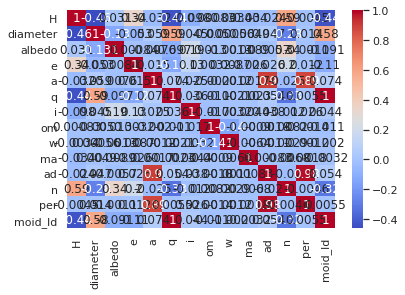

In [28]:
sns.heatmap(dataframe.corr(),cmap='coolwarm',annot=True)

In [29]:
dataframe.describe()

H       diameter         albedo              e  \
count  958524.000000  958524.000000  958524.000000  958524.000000   
mean       16.906900       4.237582       0.095562       0.156116   
std         1.785576       4.551837       0.060440       0.092643   
min        -1.100000       0.002500       0.001000       0.000000   
25%        16.100000       3.850000       0.081000       0.092193   
50%        16.900000       3.850000       0.081000       0.145002   
75%        17.700000       3.850000       0.081000       0.200650   
max        33.200000     939.400000       1.000000       1.855356   

                   a              q              i             om  \
count  958524.000000  958524.000000  958524.000000  958524.000000   
mean        2.902143       2.394887       9.054901     168.456416   
std        39.719503       2.139246       6.637656     102.881707   
min    -14702.447872       0.070511       0.007744       0.000025   
25%         2.387835       1.971401       4.165419      80.604399   
50%         2.646969       2.225816       7.415665     159.826919   
75%         3.001932       2.578315      12.407550     252.247751   
max     33488.895955      80.398819     175.082901     359.999793   

                   w             ma             ad             n  \
count  958524.000000  958524.000000  958524.000000  9.585240e+05   
mean      181.369457     177.352511       3.455819  2.366846e-01   
std       103.887995     105.816811      71.769252  7.941705e-02   
min         0.000130     -70.703676       0.653773  1.608247e-07   
25%        91.482063      83.785037       2.781604  1.894969e-01   
50%       182.358081     175.640941       3.046995  2.288655e-01   
75%       271.521589     269.865669       3.364792  2.671142e-01   
max       359.999646     491.618014   66972.796064  2.381082e+00   

                per        moid_ld  
count  9.585240e+05  958524.000000  
mean   5.085329e+03     539.422079  
std    2.308956e+06     834.839922  
min    1.511918e+02       0.000000  
25%    1.347739e+03     375.391728  
50%    1.572976e+03     477.717850  
75%    1.899765e+03     617.309237  
max    2.238462e+09   30929.908422

In [30]:
df_asteroid=dataframe[['class','diameter']]

In [31]:
df_asteroid.head(5)

class  diameter
spkid                  
2000001   MBA   939.400
2000002   MBA   545.000
2000003   MBA   246.596
2000004   MBA   525.400
2000005   MBA   106.699

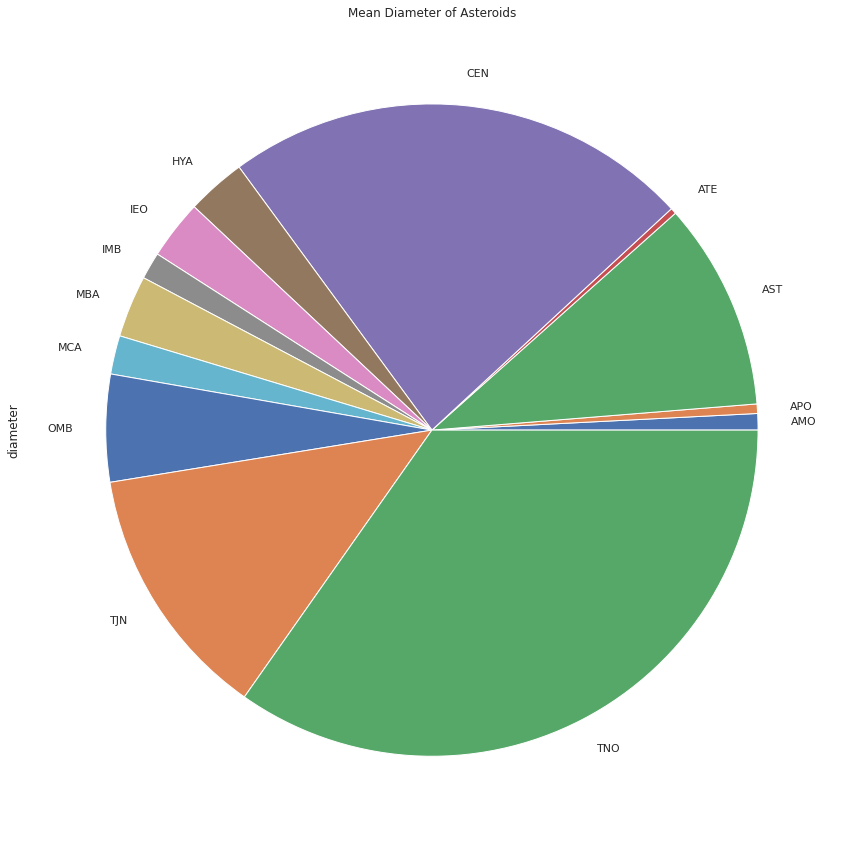

In [32]:
df_asteroid.groupby('class')['diameter'].mean().plot(kind='pie',figsize=(20,15),title='Mean Diameter of Asteroids')
plt.show()

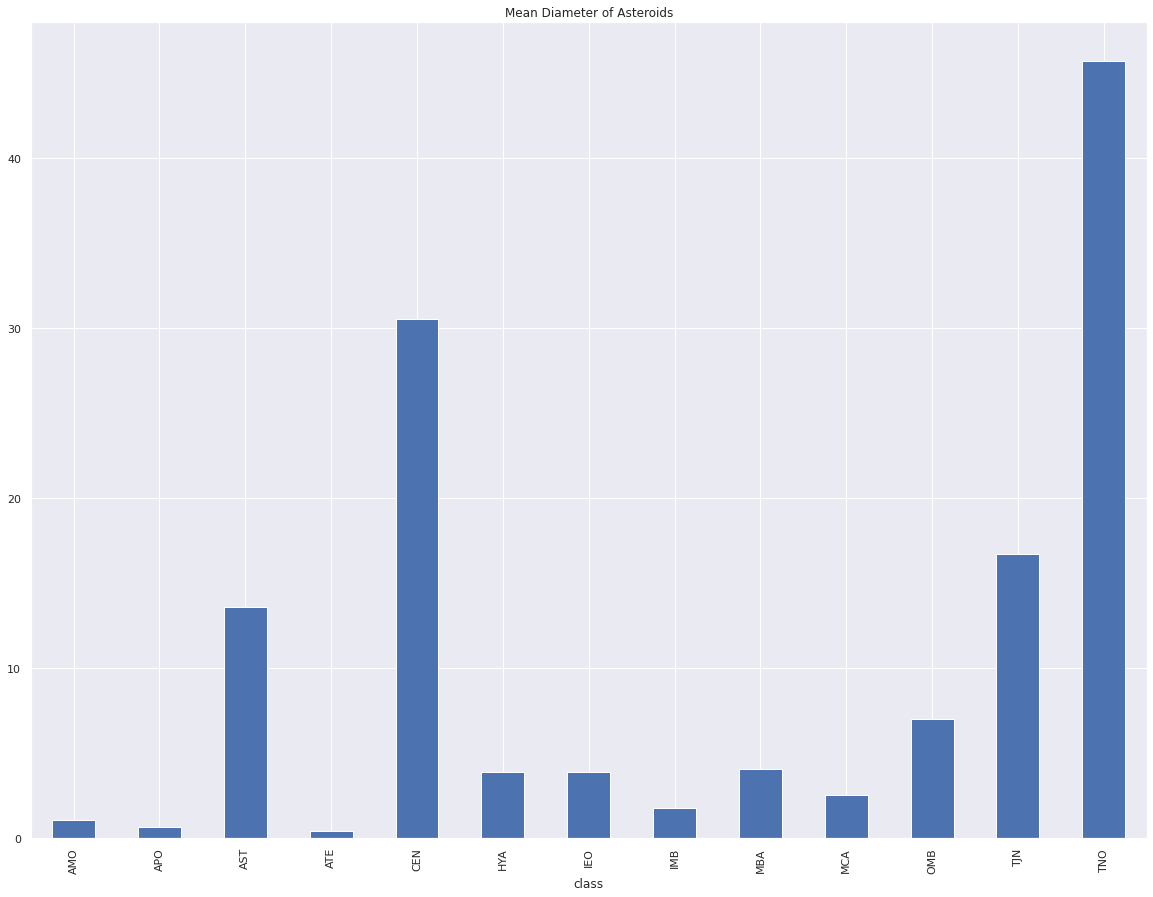

In [33]:
df_asteroid.groupby('class')['diameter'].mean().plot(kind='bar',figsize=(20,15),title='Mean Diameter of Asteroids')
plt.show()

In [34]:
dummies = pd.get_dummies(dataframe['class'])
dummies.drop(['HYA'],axis='columns',inplace=True)

In [73]:
dummies.columns

CategoricalIndex(['AMO', 'APO', 'AST', 'ATE', 'CEN', 'IEO', 'IMB', 'MBA',
                  'MCA', 'OMB', 'TJN', 'TNO'],
                 categories=['AMO', 'APO', 'AST', 'ATE', 'CEN', 'HYA', 'IEO', 'IMB', ...], ordered=False, dtype='category')

In [35]:
df_final = pd.concat([dataframe,dummies],axis='columns')

In [36]:
df_final.columns

Index(['H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad',
       'n', 'per', 'moid_ld', 'class', 'AMO', 'APO', 'AST', 'ATE', 'CEN',
       'IEO', 'IMB', 'MBA', 'MCA', 'OMB', 'TJN', 'TNO'],
      dtype='object')

In [37]:
df_final.drop(['class'],axis='columns',inplace=True)

In [38]:
df_final.head()

H  diameter  albedo         e         a         q          i  \
spkid                                                                      
2000001  3.40   939.400  0.0900  0.076009  2.769165  2.558684  10.594067   
2000002  4.20   545.000  0.1010  0.229972  2.773841  2.135935  34.832932   
2000003  5.33   246.596  0.2140  0.256936  2.668285  1.982706  12.991043   
2000004  3.00   525.400  0.4228  0.088721  2.361418  2.151909   7.141771   
2000005  6.90   106.699  0.2740  0.190913  2.574037  2.082619   5.367427   

                 om           w          ma  ...  AST  ATE  CEN  IEO  IMB  \
spkid                                        ...                            
2000001   80.305531   73.597695   77.372098  ...    0    0    0    0    0   
2000002  173.024741  310.202392  144.975675  ...    0    0    0    0    0   
2000003  169.851482  248.066193  125.435355  ...    0    0    0    0    0   
2000004  103.810804  150.728541   95.861938  ...    0    0    0    0    0   
2000005  141.571026  358.648418   17.846343  ...    0    0    0    0    0   

         MBA  MCA  OMB  TJN  TNO  
spkid                             
2000001    1    0    0    0    0  
2000002    1    0    0    0    0  
2000003    1    0    0    0    0  
2000004    1    0    0    0    0  
2000005    1    0    0    0    0  

[5 rows x 26 columns]

In [72]:
print(dummies.columns)
dummies.head(5)

CategoricalIndex(['AMO', 'APO', 'AST', 'ATE', 'CEN', 'IEO', 'IMB', 'MBA',
                  'MCA', 'OMB', 'TJN', 'TNO'],
                 categories=['AMO', 'APO', 'AST', 'ATE', 'CEN', 'HYA', 'IEO', 'IMB', ...], ordered=False, dtype='category')


AMO  APO  AST  ATE  CEN  IEO  IMB  MBA  MCA  OMB  TJN  TNO
spkid                                                              
2000001    0    0    0    0    0    0    0    1    0    0    0    0
2000002    0    0    0    0    0    0    0    1    0    0    0    0
2000003    0    0    0    0    0    0    0    1    0    0    0    0
2000004    0    0    0    0    0    0    0    1    0    0    0    0
2000005    0    0    0    0    0    0    0    1    0    0    0    0

In [40]:
#from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder(handle_unknown='ignore')

In [40]:
from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()

In [41]:
#onehot_df = pd.DataFrame(onehotencoder.fit_transform(dataframe[['class']]).toarray(),columns=onehotencoder.get_feature_names())

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [74]:
label_df = pd.DataFrame(labelbinarizer.fit_transform(dataframe[['class']]),columns=pd.get_dummies(dataframe['class']).columns)

In [75]:
label_df.head(5)

AMO  APO  AST  ATE  CEN  HYA  IEO  IMB  MBA  MCA  OMB  TJN  TNO
0    0    0    0    0    0    0    0    0    1    0    0    0    0
1    0    0    0    0    0    0    0    0    1    0    0    0    0
2    0    0    0    0    0    0    0    0    1    0    0    0    0
3    0    0    0    0    0    0    0    0    1    0    0    0    0
4    0    0    0    0    0    0    0    0    1    0    0    0    0

In [68]:
dataframe['class'].unique()

['MBA', 'OMB', 'MCA', 'AMO', 'IMB', ..., 'ATE', 'AST', 'TNO', 'IEO', 'HYA']
Length: 13
Categories (13, object): ['MBA', 'OMB', 'MCA', 'AMO', ..., 'AST', 'TNO', 'IEO', 'HYA']

In [129]:
X = dataframe.drop(['class'],axis=1)

In [130]:
X.shape


(958524, 14)

In [131]:
X.columns

Index(['H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad',
       'n', 'per', 'moid_ld'],
      dtype='object')

In [133]:
y = label_df

In [134]:
y.shape

(958524, 13)

In [135]:
from sklearn.model_selection import train_test_split

In [50]:
#from sklearn import preprocessing
#scaler = preprocessing.RobustScaler().fit(X)
#X_new = scaler.transform(X)
#stnd_scale = preprocessing.StandardScaler().fit(X_new)
#X_stsc = stnd_scale.transform(X_new)
#min_max = preprocessing.MinMaxScaler().fit(X_new)
#X_minmax = min_max.transform(X_new)

In [136]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler().fit(X)
#scaler = preprocessing.StandardScaler().fit(X)
#scaler = preprocessing.MinMaxScaler().fit(X)
X_scale = scaler.transform(X)

In [52]:
#import numpy as np
#print('Dataset mean:{:.2f} and standard deviation:{:.2f}'.format(np.average(X_new),np.std(X_new)))

In [137]:
X_data = pd.DataFrame(X_scale,columns=['H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad',
       'n', 'per', 'moid_ld'])

In [138]:
X_data.shape

(958524, 14)

In [139]:
X_data.describe()

H       diameter         albedo              e  \
count  958524.000000  958524.000000  958524.000000  958524.000000   
mean        0.004312       0.387582       0.014562       0.102479   
std         1.115985       4.551837       0.060440       0.854185   
min       -11.250000      -3.847500      -0.080000      -1.336947   
25%        -0.500000       0.000000       0.000000      -0.486908   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.500000       0.000000       0.000000       0.513092   
max        10.187500     935.550000       0.919000      15.769833   

                   a              q             i            om             w  \
count  958524.000000  958524.000000  9.585240e+05  9.585240e+05  9.585240e+05   
mean        0.415527       0.278576  1.988850e-01  5.027574e-02 -5.491150e-03   
std        64.679504       3.524790  8.053325e-01  5.993923e-01  5.770288e-01   
min    -23945.874452      -3.551251 -8.987871e-01 -9.311569e-01 -1.012877e+00   
25%        -0.421976      -0.419194 -3.943453e-01 -4.615531e-01 -5.047559e-01   
50%         0.000000       0.000000  5.388040e-17 -8.279281e-17 -7.893188e-17   
75%         0.578024       0.580806  6.056547e-01  5.384469e-01  4.952441e-01   
max     54529.231038     128.804017  2.034270e+01  1.166214e+00  9.866809e-01   

                  ma             ad              n           per  \
count  958524.000000  958524.000000  958524.000000  9.585240e+05   
mean        0.009198       0.701015       0.100739  6.362660e+00   
std         0.568661     123.063586       1.023188  4.182694e+03   
min        -1.323860      -4.103686      -2.948639 -2.575574e+00   
25%        -0.493635      -0.455069      -0.507214 -4.080188e-01   
50%         0.000000       0.000000       0.000000  0.000000e+00   
75%         0.506365       0.544931       0.492786  5.919812e-01   
max         1.698065  114833.822460      27.728567  4.054990e+06   

             moid_ld  
count  958524.000000  
mean        0.255063  
std         3.450928  
min        -1.974714  
25%        -0.422979  
50%         0.000000  
75%         0.577021  
max       125.878406

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.4, random_state=42)

In [141]:
print(X_train.shape)
print(X_test.shape)

(575114, 14)
(383410, 14)


In [142]:
X_test.isnull().sum()

H           0
diameter    0
albedo      0
e           0
a           0
q           0
i           0
om          0
w           0
ma          0
ad          0
n           0
per         0
moid_ld     0
dtype: int64

In [143]:
y_test


AMO  APO  AST  ATE  CEN  HYA  IEO  IMB  MBA  MCA  OMB  TJN  TNO
323650    0    0    0    0    0    0    0    0    1    0    0    0    0
571724    0    0    0    0    0    0    0    0    1    0    0    0    0
395983    0    0    0    0    0    0    0    0    1    0    0    0    0
235862    0    0    0    0    0    0    0    0    1    0    0    0    0
651830    0    0    0    0    0    0    0    0    1    0    0    0    0
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
355728    0    0    0    0    0    0    0    0    1    0    0    0    0
136700    0    0    0    0    0    0    0    0    1    0    0    0    0
828143    0    0    0    0    0    0    0    0    1    0    0    0    0
725386    0    0    0    0    0    0    0    0    1    0    0    0    0
25552     0    0    0    0    0    0    0    0    1    0    0    0    0

[383410 rows x 13 columns]

In [144]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'multilabel-indicator'

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#from joblib import parallel_backend


In [121]:
from dask.distributed import Client
import joblib

client = Client()

In [92]:
client

<Client: 'tcp://127.0.0.1:46424' processes=4 threads=16, memory=107.37 GB>

In [122]:
p = [1,2]
leaf_size = list(range(30,40,1))
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
n_neighbors = list(range(5,17,2))


In [123]:
param_grid = dict(p=p,leaf_size=leaf_size,weights=weights,metric=metric,n_neighbors=n_neighbors)

In [124]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,random_state=10)

In [156]:
from skmultilearn.problem_transform import ClassifierChain

In [162]:
knn = ClassifierChain(KNeighborsClassifier())

In [66]:
#from dask_ml.model_selection import GridSearchCV

In [163]:
from sklearn.model_selection import GridSearchCV

In [164]:
grid_se = GridSearchCV(estimator=knn,param_grid=param_grid,cv=cv,n_jobs=-1)

In [165]:
grid_se.fit(X_train,y_train)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.

In [72]:
from dask.distributed import performance_report

with performance_report(filename="dask-report.html"):
    with joblib.parallel_backend('dask'):
        grid_se.fit(X_train,y_train)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.

In [182]:
#with joblib.parallel_backend('dask'):
#    knn.fit(X_train,y_train)

In [183]:
from joblib import parallel_backend
with parallel_backend('threading', n_jobs=-1):
    y_pred = knn.predict(X_test)

In [184]:
print(metrics.accuracy_score(y_test,y_pred))

0.9926240838788764


In [ ]:
#knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
#knn.fit(X_train,y_train)

In [ ]:
#y_pred = knn.predict(X_test)
#print(metrics.accuracy_score(y_test,y_pred))

In [89]:
import numpy as np
x = list(range(1,50))

In [90]:
print(x)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
